<a href="https://colab.research.google.com/github/shaik-tahir/Mushroom-Classificaion-/blob/master/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving datasets_478_974_mushrooms.csv to datasets_478_974_mushrooms (4).csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['datasets_478_974_mushrooms.csv']))
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
print('The Mushroom data set has rows :{} and columns :{}'.format(df.shape[0],df.shape[1]))

The Mushroom data set has rows :8124 and columns :23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#2.A)
> * All 23 atttributes in the data set is of object type 

In [ ]:
# 2B)
df.describe()  # 5 point summary is not avaialble as all features here are of object type

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
pd.DataFrame({'Count':df.isnull().sum(),'% Missing':df.isnull().sum()/df.shape[0]})*100 # Checking for null values

,Count,% Missing
class,0,0.0
cap-shape,0,0.0
cap-surface,0,0.0
cap-color,0,0.0
bruises,0,0.0
odor,0,0.0
gill-attachment,0,0.0
gill-spacing,0,0.0
gill-size,0,0.0
gill-color,0,0.0




> # Exploratory Data Anlysis 



In [ ]:
#2 C) 
for i in df.select_dtypes(include='O'):        
  print(i,'unique values are:',df[i].nunique(),'--- they are:',df[i].unique(),'---and the % of observation in each feaure is: \n',df[i].value_counts(normalize=True)*100)
  print('*'*50)

class unique values are: 2 --- they are: ['p' 'e'] ---and the % of observation in each feaure is: 
 e    51.797144
p    48.202856
Name: class, dtype: float64
**************************************************
cap-shape unique values are: 6 --- they are: ['x' 'b' 's' 'f' 'k' 'c'] ---and the % of observation in each feaure is: 
 x    45.002462
f    38.798621
k    10.192024
b     5.563762
s     0.393895
c     0.049237
Name: cap-shape, dtype: float64
**************************************************
cap-surface unique values are: 4 --- they are: ['s' 'y' 'f' 'g'] ---and the % of observation in each feaure is: 
 y    39.931068
s    31.462334
f    28.557361
g     0.049237
Name: cap-surface, dtype: float64
**************************************************
cap-color unique values are: 10 --- they are: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] ---and the % of observation in each feaure is: 
 n    28.114229
g    22.648941
e    18.463811
y    13.195470
w    12.801576
b     2.067947
p     1.7725

In [ ]:
#3 a)
df.replace('?',np.nan,inplace=True)  # replacing as Nan value

In [ ]:
pd.DataFrame({'Count':df.isnull().sum(),'% Missing':df.isnull().sum()/df.shape[0]*100}) # Checking for null values

,Count,% Missing
class,0,0.000000
cap-shape,0,0.000000
cap-surface,0,0.000000
cap-color,0,0.000000
bruises,0,0.000000
odor,0,0.000000
gill-attachment,0,0.000000
gill-spacing,0,0.000000
gill-size,0,0.000000
gill-color,0,0.000000




> We notice that stalk-root has 30% missing values 



AxesSubplot(0.125,0.125;0.775x0.755)


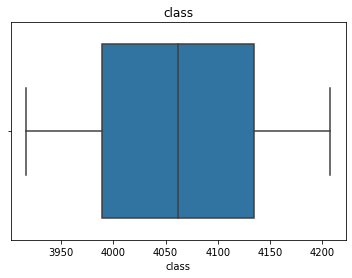

AxesSubplot(0.125,0.125;0.775x0.755)


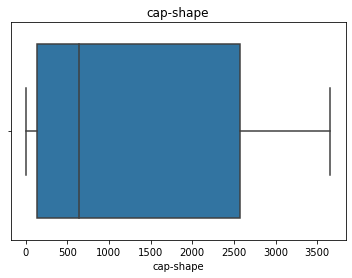

AxesSubplot(0.125,0.125;0.775x0.755)


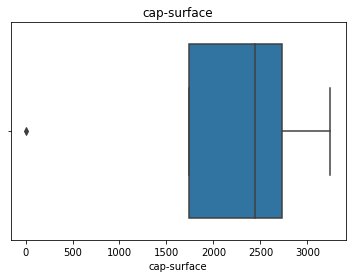

AxesSubplot(0.125,0.125;0.775x0.755)


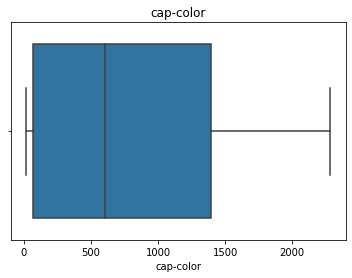

AxesSubplot(0.125,0.125;0.775x0.755)


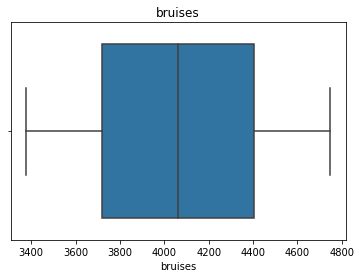

AxesSubplot(0.125,0.125;0.775x0.755)


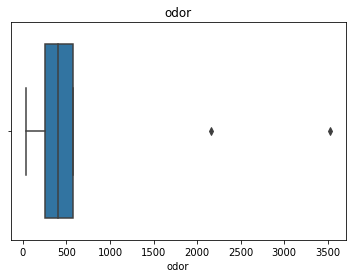

AxesSubplot(0.125,0.125;0.775x0.755)


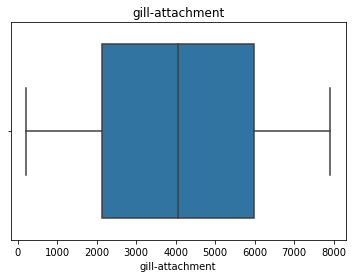

AxesSubplot(0.125,0.125;0.775x0.755)


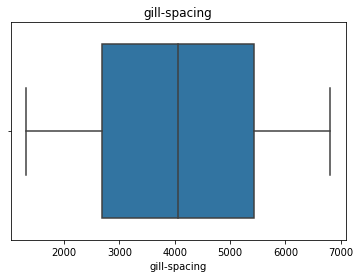

AxesSubplot(0.125,0.125;0.775x0.755)


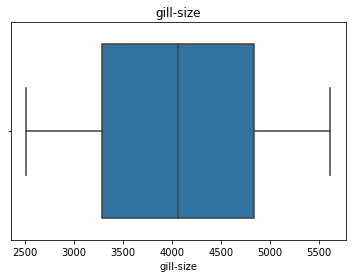

AxesSubplot(0.125,0.125;0.775x0.755)


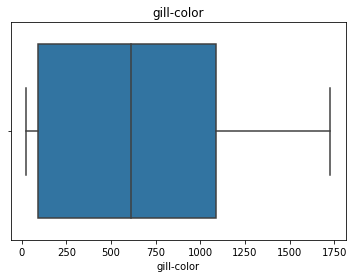

AxesSubplot(0.125,0.125;0.775x0.755)


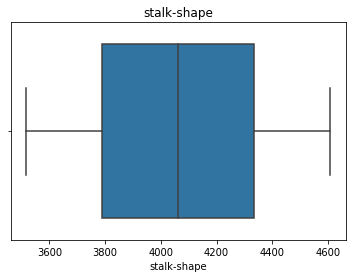

AxesSubplot(0.125,0.125;0.775x0.755)


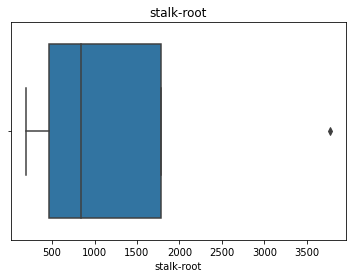

AxesSubplot(0.125,0.125;0.775x0.755)


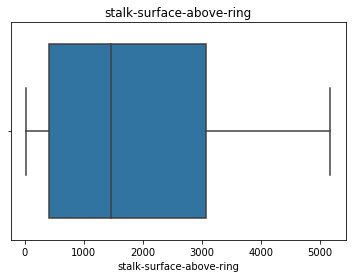

AxesSubplot(0.125,0.125;0.775x0.755)


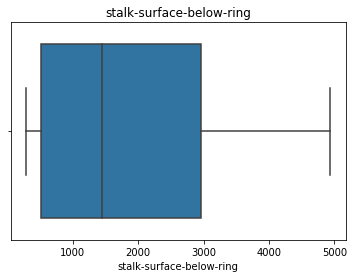

AxesSubplot(0.125,0.125;0.775x0.755)


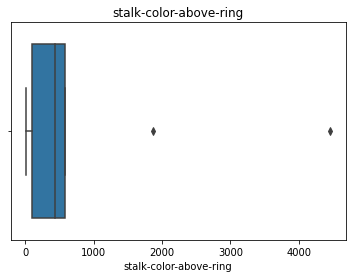

AxesSubplot(0.125,0.125;0.775x0.755)


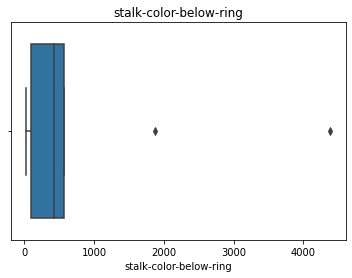

AxesSubplot(0.125,0.125;0.775x0.755)


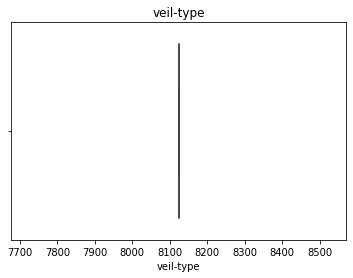

AxesSubplot(0.125,0.125;0.775x0.755)


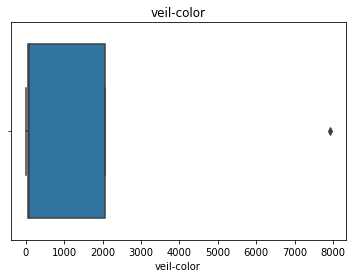

AxesSubplot(0.125,0.125;0.775x0.755)


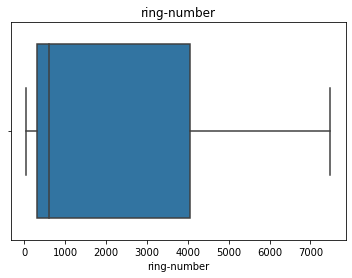

AxesSubplot(0.125,0.125;0.775x0.755)


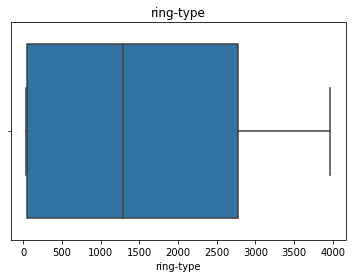

AxesSubplot(0.125,0.125;0.775x0.755)


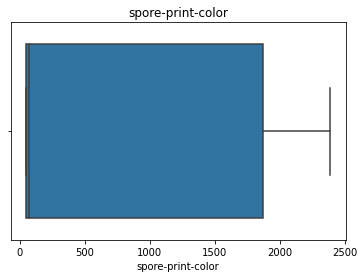

AxesSubplot(0.125,0.125;0.775x0.755)


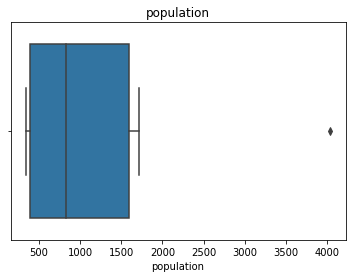

AxesSubplot(0.125,0.125;0.775x0.755)


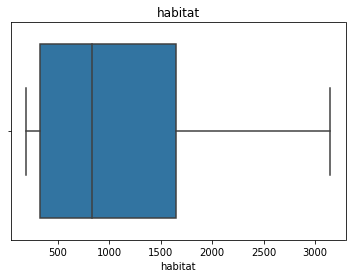

In [ ]:
#3B) Checking for outliers in the dataset 

for i in df.describe(include='O').columns:
    plt.subplots()
    plt.title(i)
    print(sns.boxplot(x=df[i].value_counts(),hue='class',data=df)) # have to use value counts 
    plt.show()

#3 C) 
> - Yes , the target column in distributed evenly 

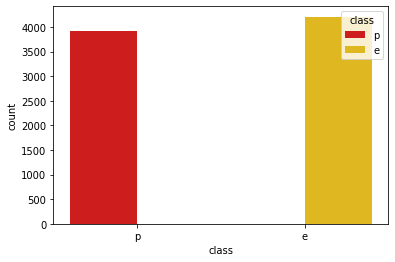

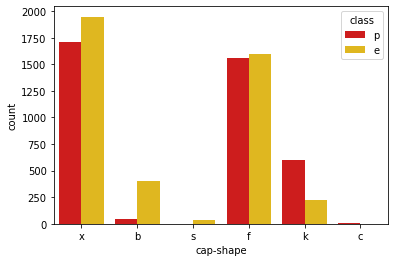

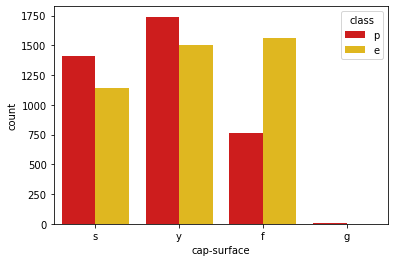

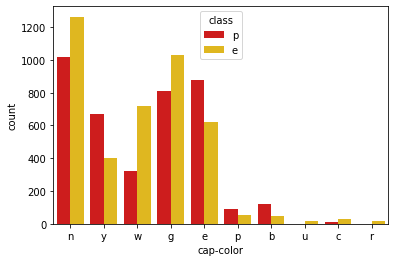

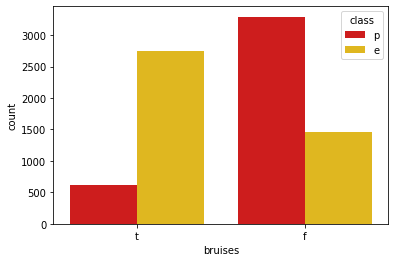

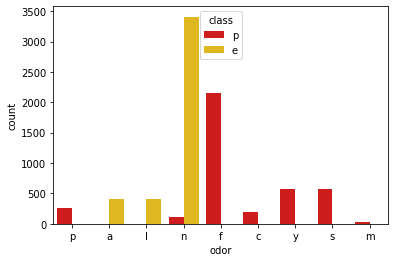

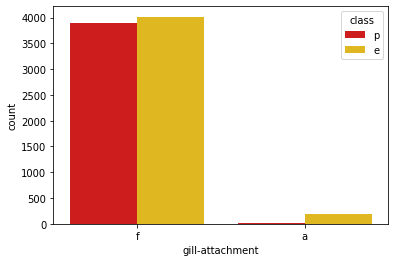

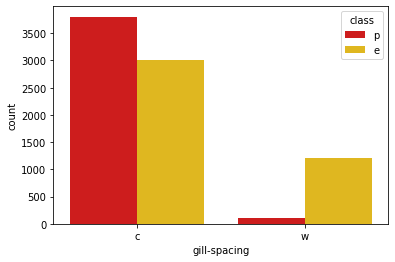

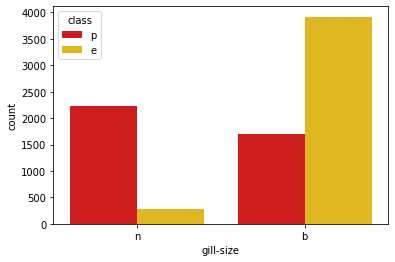

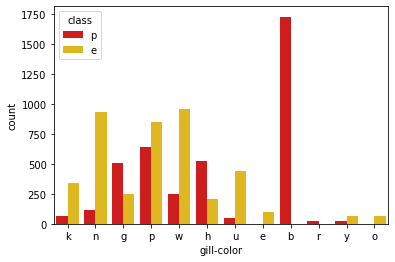

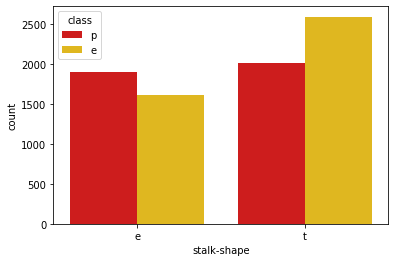

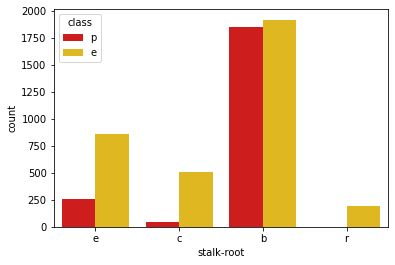

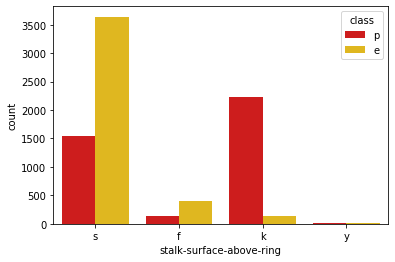

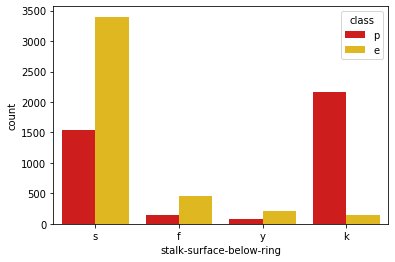

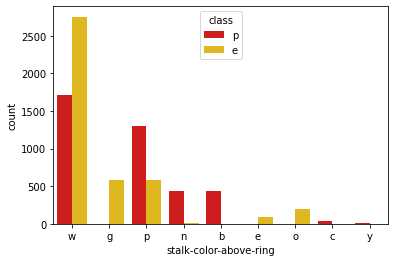

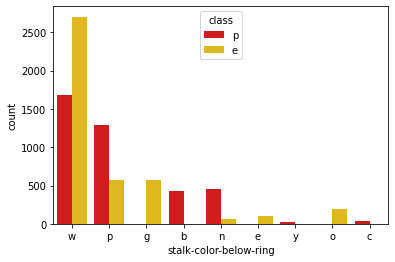

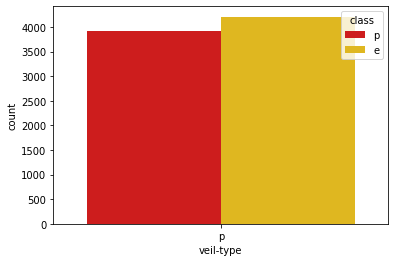

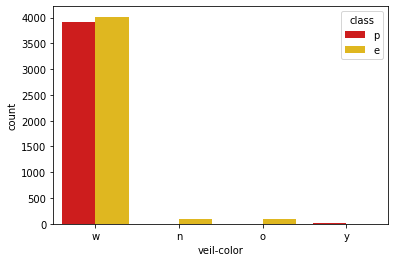

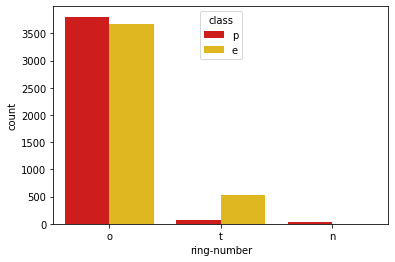

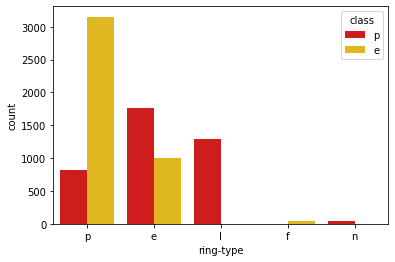

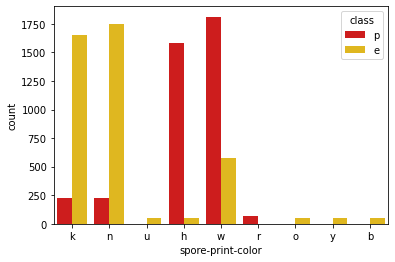

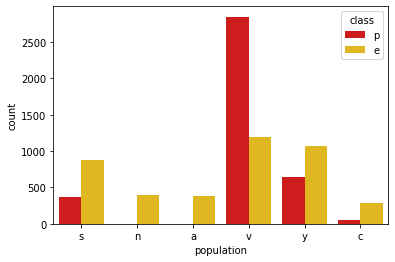

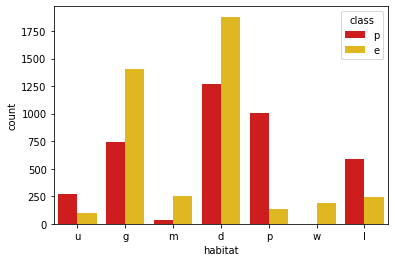

In [ ]:
#4A)

for i in df.columns:
  plt.subplots()            # using value counts to count each observation in each feature
  sns.countplot(df[i],hue=df['class'],palette='hot')

In [ ]:
for i in df.columns:        # veil-type has only one value p. we can eliminate it.
  if df[i].nunique()==1:
    print(i)

veil-type


In [ ]:
df = df.drop('veil-type', axis=1)  



* #### First the data will be label encoded and will check the performance with logistic regression 
* #### Second the data will be transformed using pd.get_dummies and will then check the peformance with logistic regression 



In [ ]:
df1=df.copy(deep=True) # Results with Label encoding 
df2=df.copy(deep=True) # Results with pd.get_dummies / One Hot encoding

In [ ]:
df1['stalk-root'].unique()

array(['e', 'c', 'b', 'r', nan], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
encoder = LabelEncoder()   # Label Encoding 

# create a list of categorical columns to iterate over
cat_cols = df1.columns

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_label = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_label)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df1[columns])

In [ ]:
df1['stalk-root'].unique()

array([2, 1, 0, 3, nan], dtype=object)

In [ ]:
# impute data and convert 
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=7)

df1['stalk-root']=imputer.fit_transform(df1[['stalk-root']])   # Have to pass as 2d array 

In [ ]:
df1['stalk-root'].unique()

array([2.        , 1.        , 0.        , 3.        , 0.59744862])

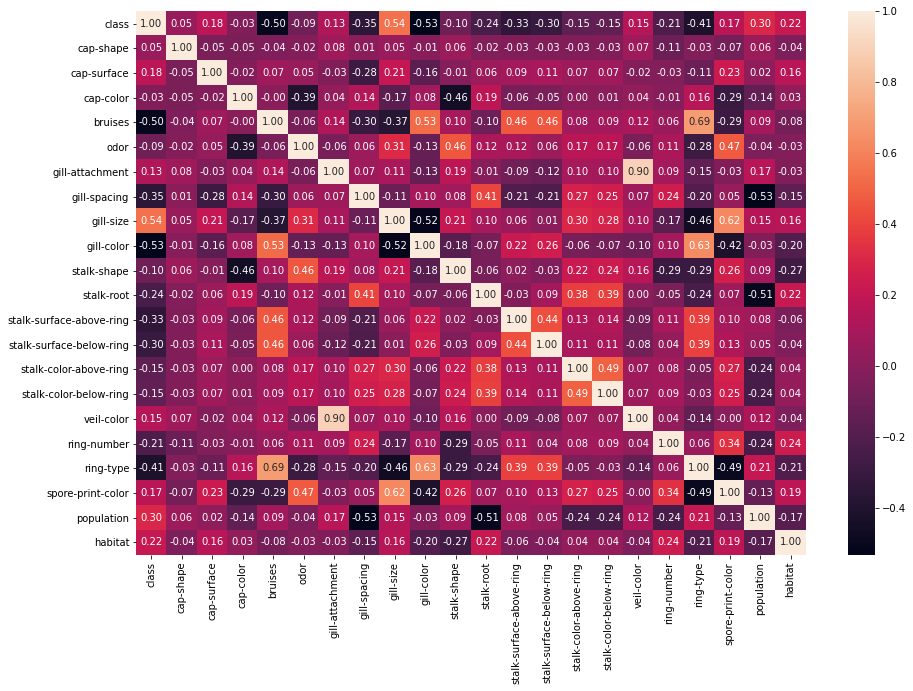

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f')
plt.show()

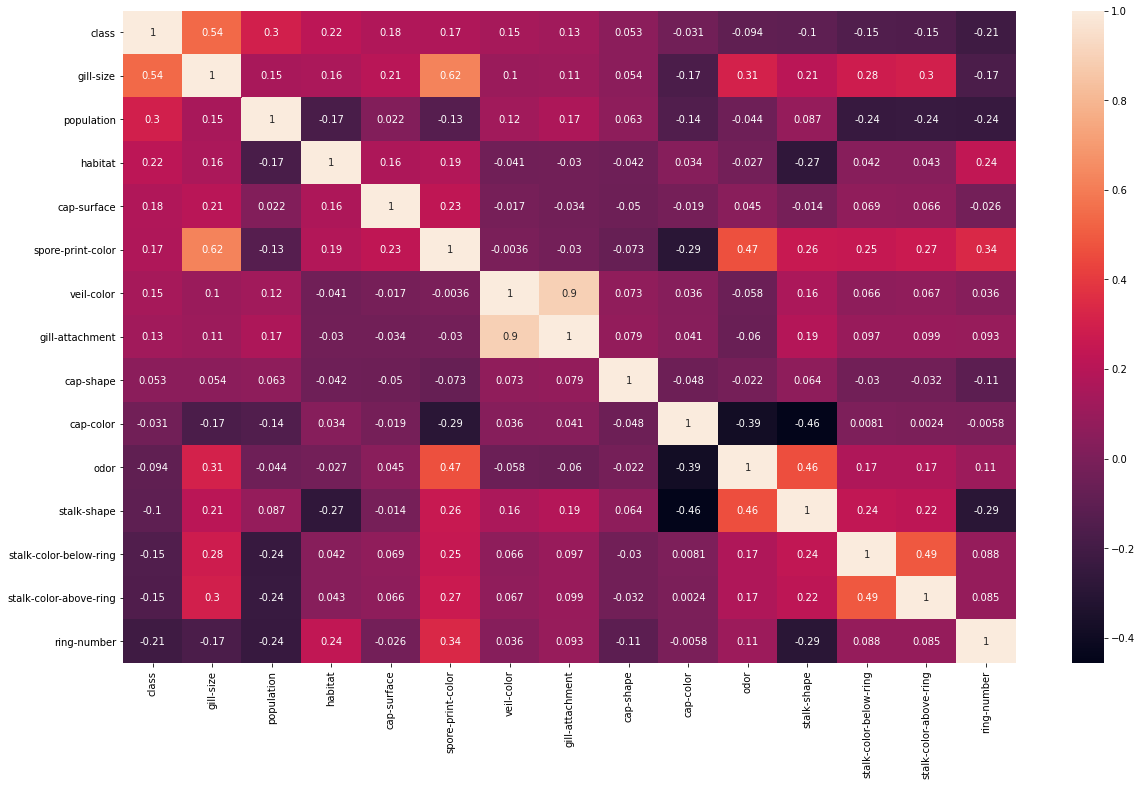

In [ ]:
corr=df1.corr()                              # Top 15 features that high high correlation with class 
cols=corr.nlargest(15,'class').index
cm = np.corrcoef(df1[cols].values.T)
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

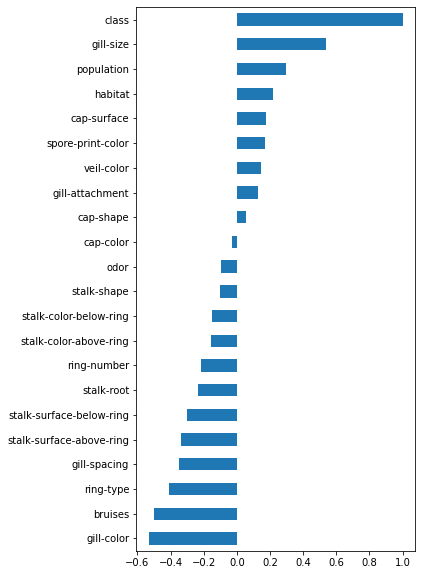

In [ ]:
plt.rcParams['figure.figsize'] = (5, 10.0)
df1.corr()['class'].sort_values().plot(kind = "barh")
plt.show()

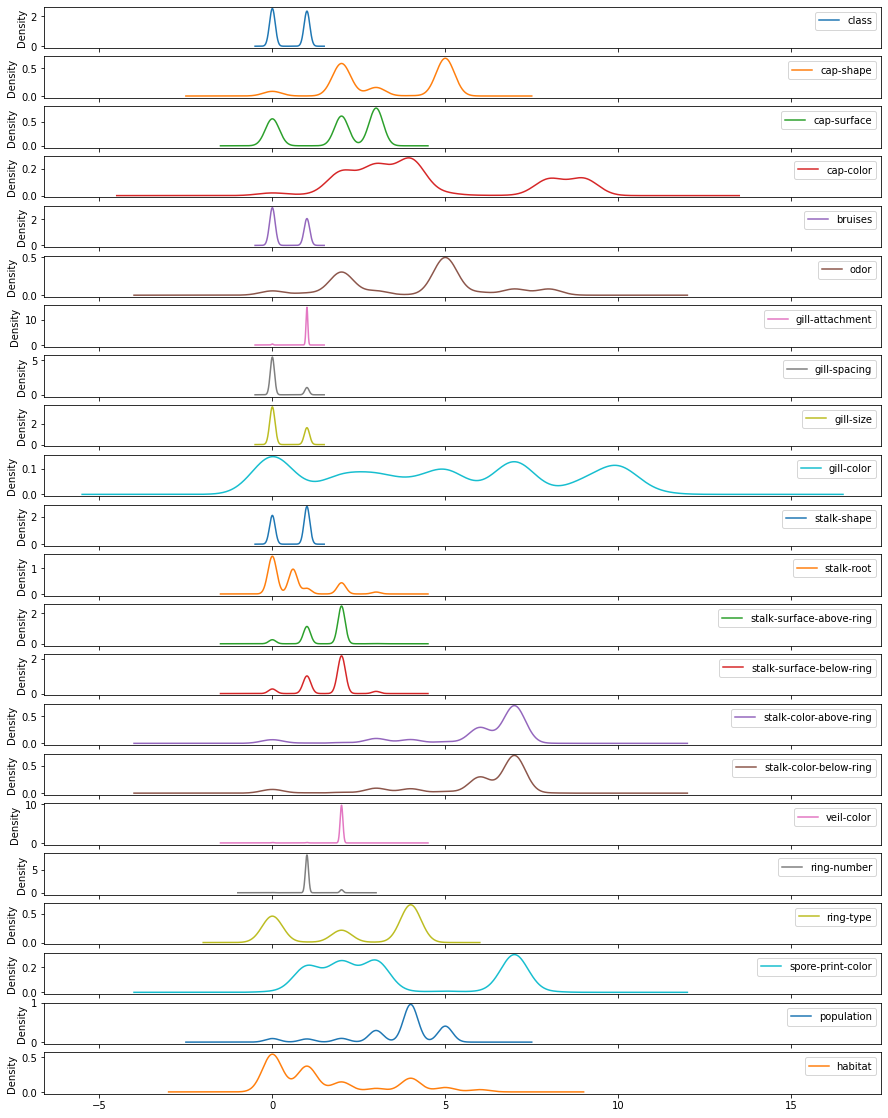

<Figure size 360x720 with 0 Axes>

In [ ]:
df1.plot(kind='kde',subplots=True,figsize=(15,20))
plt.show()
plt.tight_layout()

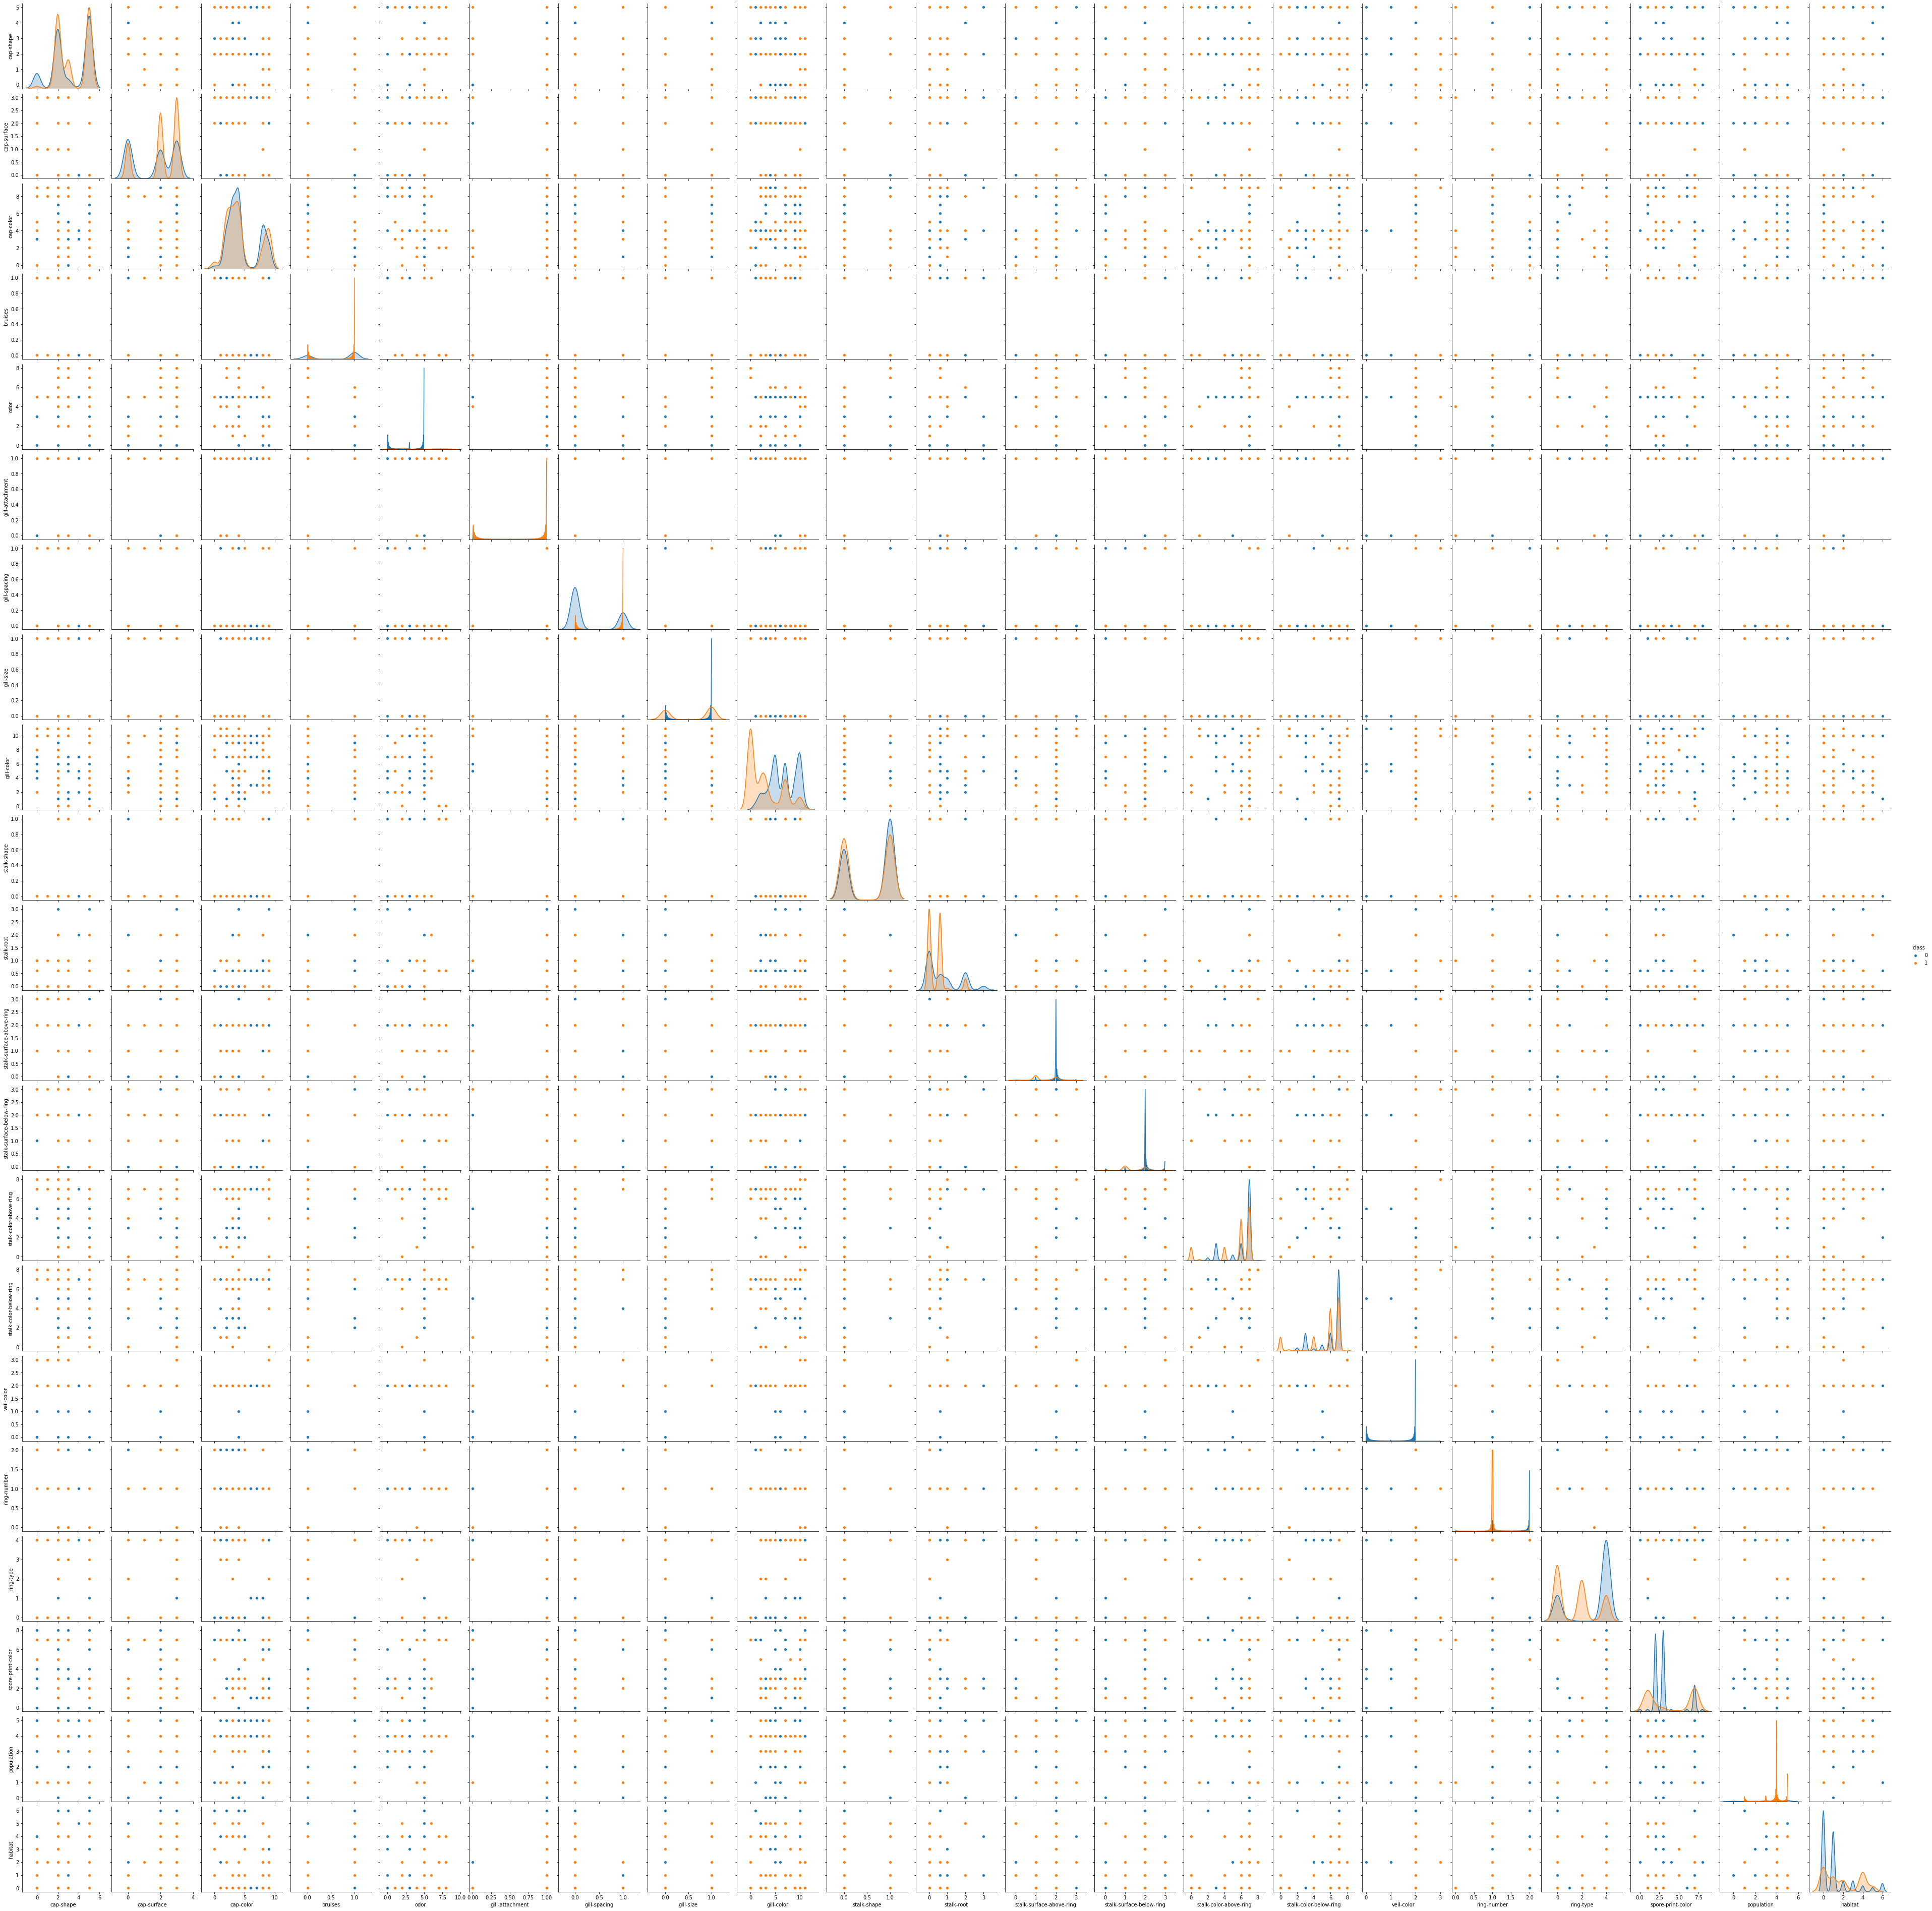

In [ ]:
#sns.pairplot(df1,hue='class',diag_kind='kde')



> # Statistical Analysis 



In [ ]:
from scipy.stats import chi2_contingency,f_oneway

In [ ]:
cat_cols=df.describe(include='O').columns   # Used df here as all features are categorical

chi_stat=[]
p_value=[]
for i in cat_cols:
    chi_res=chi2_contingency(np.array(pd.crosstab(df[i],df['class'])))
    chi_stat.append(chi_res[0])
    p_value.append(chi_res[1])
chi_square=pd.DataFrame([chi_stat,p_value])
chi_square=chi_square.T
col=['Chi Square Value','P-Value']
chi_square.columns=col
chi_square.index=cat_cols

In [ ]:
chi_square  # Need to interpret the Pvalue correctly here 

,Chi Square Value,P-Value
class,8119.995319,0.000000e+00
cap-shape,489.919954,1.196457e-103
cap-surface,315.042831,5.518427e-68
cap-color,387.597769,6.055815e-78
bruises,2041.415647,0.000000e+00
odor,7659.726740,0.000000e+00
gill-attachment,133.986181,5.501707e-31
gill-spacing,984.143333,5.022978e-216
gill-size,2366.834257,0.000000e+00
gill-color,3765.714086,0.000000e+00


In [ ]:
features_p = list(chi_square[chi_square["P-Value"]==0.00].index)  # Selected 13 important features based on chi2 test 
print("Significant categorical Features:\n\n",features_p)

Significant categorical Features:

 ['class', 'bruises', 'odor', 'gill-size', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [ ]:
num_cols=df1.describe(exclude='O') 
num_cols.columns

f_stat=[]
p_val=[]
for i in num_cols:
    edible=df1[df['class']=='e'][i]  # make sure to use df as target variable is categorical and only then can use ANOVA
    poison=df1[df['class']=='p'][i]
    a=f_oneway(edible,poison)
    f_stat.append(a[0])
    p_val.append(a[1])
anova=pd.DataFrame([f_stat,p_val])
anova=anova.T
cols=['F-STAT','P-VALUE']
anova.columns=cols
anova.index=num_cols.columns

In [ ]:
anova

,F-STAT,P-VALUE
class,-2.415183e+19,NaN
cap-shape,2.283618e+01,1.795098e-06
cap-surface,2.671354e+02,4.166718e-59
cap-color,8.007740e+00,4.669212e-03
bruises,2.729510e+03,0.000000e+00
odor,7.171062e+01,2.929306e-17
gill-attachment,1.378789e+02,1.393189e-31
gill-spacing,1.121972e+03,1.563859e-230
gill-size,3.343700e+03,0.000000e+00
gill-color,3.182113e+03,0.000000e+00


In [ ]:
features_p_n = list(anova[anova["P-VALUE"]==0.00].index)  # Anova chose 4 significant features
print("Significant numerical Features:\n\n",features_p_n)

Significant numerical Features:

 ['bruises', 'gill-size', 'gill-color', 'ring-type']




> # Splitting the data set into Train and Test with df1 



In [ ]:
X=df1.drop('class',axis=1)
y=df1['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(5686, 21)
(2438, 21)
(5686,)
(2438,)
(8124, 21)
(8124,)


In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score , roc_curve,classification_report,precision_score,recall_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score,KFold



lr = LogisticRegression(fit_intercept=True)
gnb= GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(ccp_alpha=0.01) # to increase pruning and avoid overfitting
svm= SVC(probability=True)
lda=LinearDiscriminantAnalysis()

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state=123)))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=123)))
models.append(('SVM', SVC(probability=True,random_state=123)))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.959549 (0.009887)
GNB: 0.913119 (0.008451)
KNN: 0.998242 (0.001926)
DecisionTree: 1.000000 (0.000000)
SVM: 0.990855 (0.003321)
LDA: 0.943019 (0.008170)


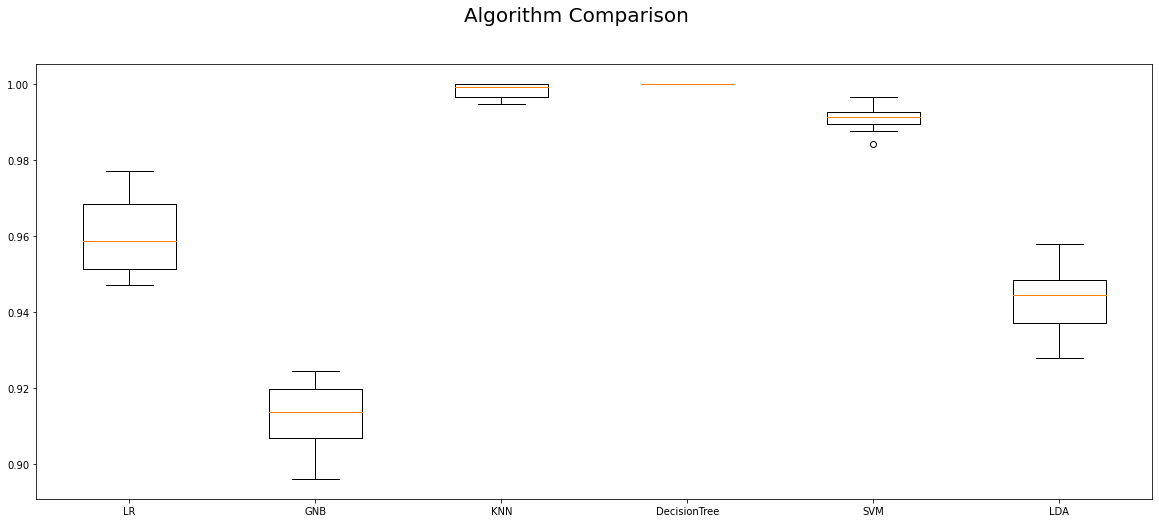

In [ ]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison',fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(20,8)
plt.show()

In [ ]:
def model_eval(algo,X_train,X_test,y_train,y_test):
  algo.fit(X_train,y_train)

  y_train_pred=algo.predict(X_train)             # Finding the positives and negatives 
  y_train_prob=algo.predict_proba(X_train)[:,1]  # we are intersted only in the second column

  #overall accuracy for train model
  print('Confusion Matrix- Train:','\n',confusion_matrix(y_train,y_train_pred))
  print('Overall Accuracy-Train:',accuracy_score(y_train,y_train_pred))
  print('AUC-Train',roc_auc_score(y_train,y_train_prob))

  y_test_pred=algo.predict(X_test)
  y_test_prob=algo.predict_proba(X_test)[:,1]
  print('*'*50)

  #overall accuracy of test model
  print('Confusion matrix - Test :','\n',confusion_matrix(y_test,y_test_pred))
  print('Overall Accuracy - Test :',accuracy_score(y_test,y_test_pred))
  print('AUC - Test:',roc_auc_score(y_test,y_test_prob))

  print('*'*50)
  scores=cross_val_score(algo,X,y,cv=3,scoring='roc_auc')
  print('3 Fold Cross Validation Scores')
  print(scores)
  print('Bias Error:',100-scores.mean()*100)
  print('Variance Error:',scores.std()*100)


  print('*'*50)
  print('Classification Report for test model: \n', classification_report(y_test,y_test_pred))

  fpr,tpr,threshold=roc_curve(y_test,y_test_prob,pos_label=[2])
  plt.figure(figsize=(15,8))
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr,color='r')
  plt.xlabel('Fpr')
  plt.ylabel('Tpr')



> ### -Logistic Regression


Confusion Matrix- Train: 
 [[2838   99]
 [ 122 2627]]
Overall Accuracy-Train: 0.9611326064016884
AUC-Train 0.9871730990053893
**************************************************
Confusion matrix - Test : 
 [[1220   51]
 [  48 1119]]
Overall Accuracy - Test : 0.9593929450369155
AUC - Test: 0.9834317316554043
**************************************************
3 Fold Cross Validation Scores
[0.87334764 0.90598089 0.79403632]
Bias Error: 14.221172013639858
Variance Error: 4.700685816662166
**************************************************
Classification Report for test model: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1271
           1       0.96      0.96      0.96      1167

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



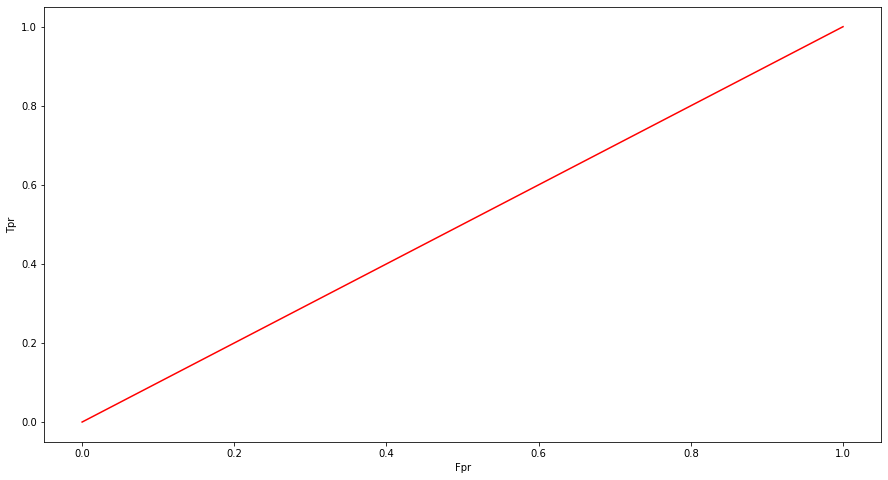

In [ ]:
model_eval(lr,X_train,X_test,y_train,y_test)  

> # 6E) 
> * other metric to evaluate the model output are roc_auc_score,confusion matrix , bias and vraince error ,classification report , given above
> * Also talk about sensitivity and specifity ,TPR and FPR to get a whollistic view

In [ ]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier(random_state=123)
dummy.fit(X_train,y_train)
print('The dummy classifier gives us a basic score',dummy.score(y_test,y_test_pred))

The dummy classifier gives us a basic score 0.5098441345365053


This means that a dumb model that always predicts 0 would be right 50% of the time

This shows how classification accuracy is not that good as it's close to a dumb model.
It's a good way to know the minimum we should achieve with our models


In [ ]:
lr.fit(X_train,y_train)
y_test_pred=lr.predict(X_test)

In [ ]:
print('The Precision Score for Logistic Regression Model is:',precision_score(y_test,y_test_pred))
print('The Recall Score for Logistic Regression Model is:',recall_score(y_test,y_test_pred))
print('The F1 Score for Logistic Regression Model is:',f1_score(y_test,y_test_pred)) 

The Precision Score for Logistic Regression Model is: 0.9564102564102565
The Recall Score for Logistic Regression Model is: 0.9588688946015425
The F1 Score for Logistic Regression Model is: 0.9576379974326058




1. The optimisation objective is to maximise likelihood or minimise MSE.
2. We see that the overall accuracy of the model is 95.97 %. This is a fantastic score but can be further improved. 



In [ ]:
coeff_df = pd.DataFrame(X.columns) # Variables that are significant in prediction based on their coef vals
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])
pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,gill-size,8.995412
15,veil-color,5.147724
17,ring-type,0.669324
16,ring-number,0.526285
1,cap-surface,0.473536
20,habitat,0.221773
14,stalk-color-below-ring,0.067381
13,stalk-color-above-ring,-0.016059
2,cap-color,-0.026587
0,cap-shape,-0.043704


In [ ]:
from sklearn.metrics import cohen_kappa_score  # Very Good Score
cohen_kappa_score(y_test,y_test_pred)

0.9186463918005303

Cohen Kappa is always less than or equal to 1. A value of 1 implies perfect agreement and values less than 1 imply less than perfect agreement. In rare situations, Kappa can be negative. This is a sign that the two observers agreed less than would be expected just by chance.

*   0 = agreement equivalent to chance.
*   0.1 – 0.20 = slight agreement.
*   0.21 – 0.40 = fair agreement.
*  0.41 – 0.60 = moderate agreement.
*  0.61 – 0.80 = substantial agreement.
*  0.81 – 0.99 = near perfect agreement
*  1 = perfect agreement.

Evaluates the level of agreement betwen observers. In this case between y_test and predicted values for X_test



> # Lets try with df2 which is transformed using pd.get_dummies / One Hot Endcoding



In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df2=pd.get_dummies(data=df2,drop_first=True)
df2.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class_p                     8124 non-null   uint8
 1   cap-shape_c                 8124 non-null   uint8
 2   cap-shape_f                 8124 non-null   uint8
 3   cap-shape_k                 8124 non-null   uint8
 4   cap-shape_s                 8124 non-null   uint8
 5   cap-shape_x                 8124 non-null   uint8
 6   cap-surface_g               8124 non-null   uint8
 7   cap-surface_s               8124 non-null   uint8
 8   cap-surface_y               8124 non-null   uint8
 9   cap-color_c                 8124 non-null   uint8
 10  cap-color_e                 8124 non-null   uint8
 11  cap-color_g                 8124 non-null   uint8
 12  cap-color_n                 8124 non-null   uint8
 13  cap-color_p                 8124 non-null   uint8
 14  cap-colo

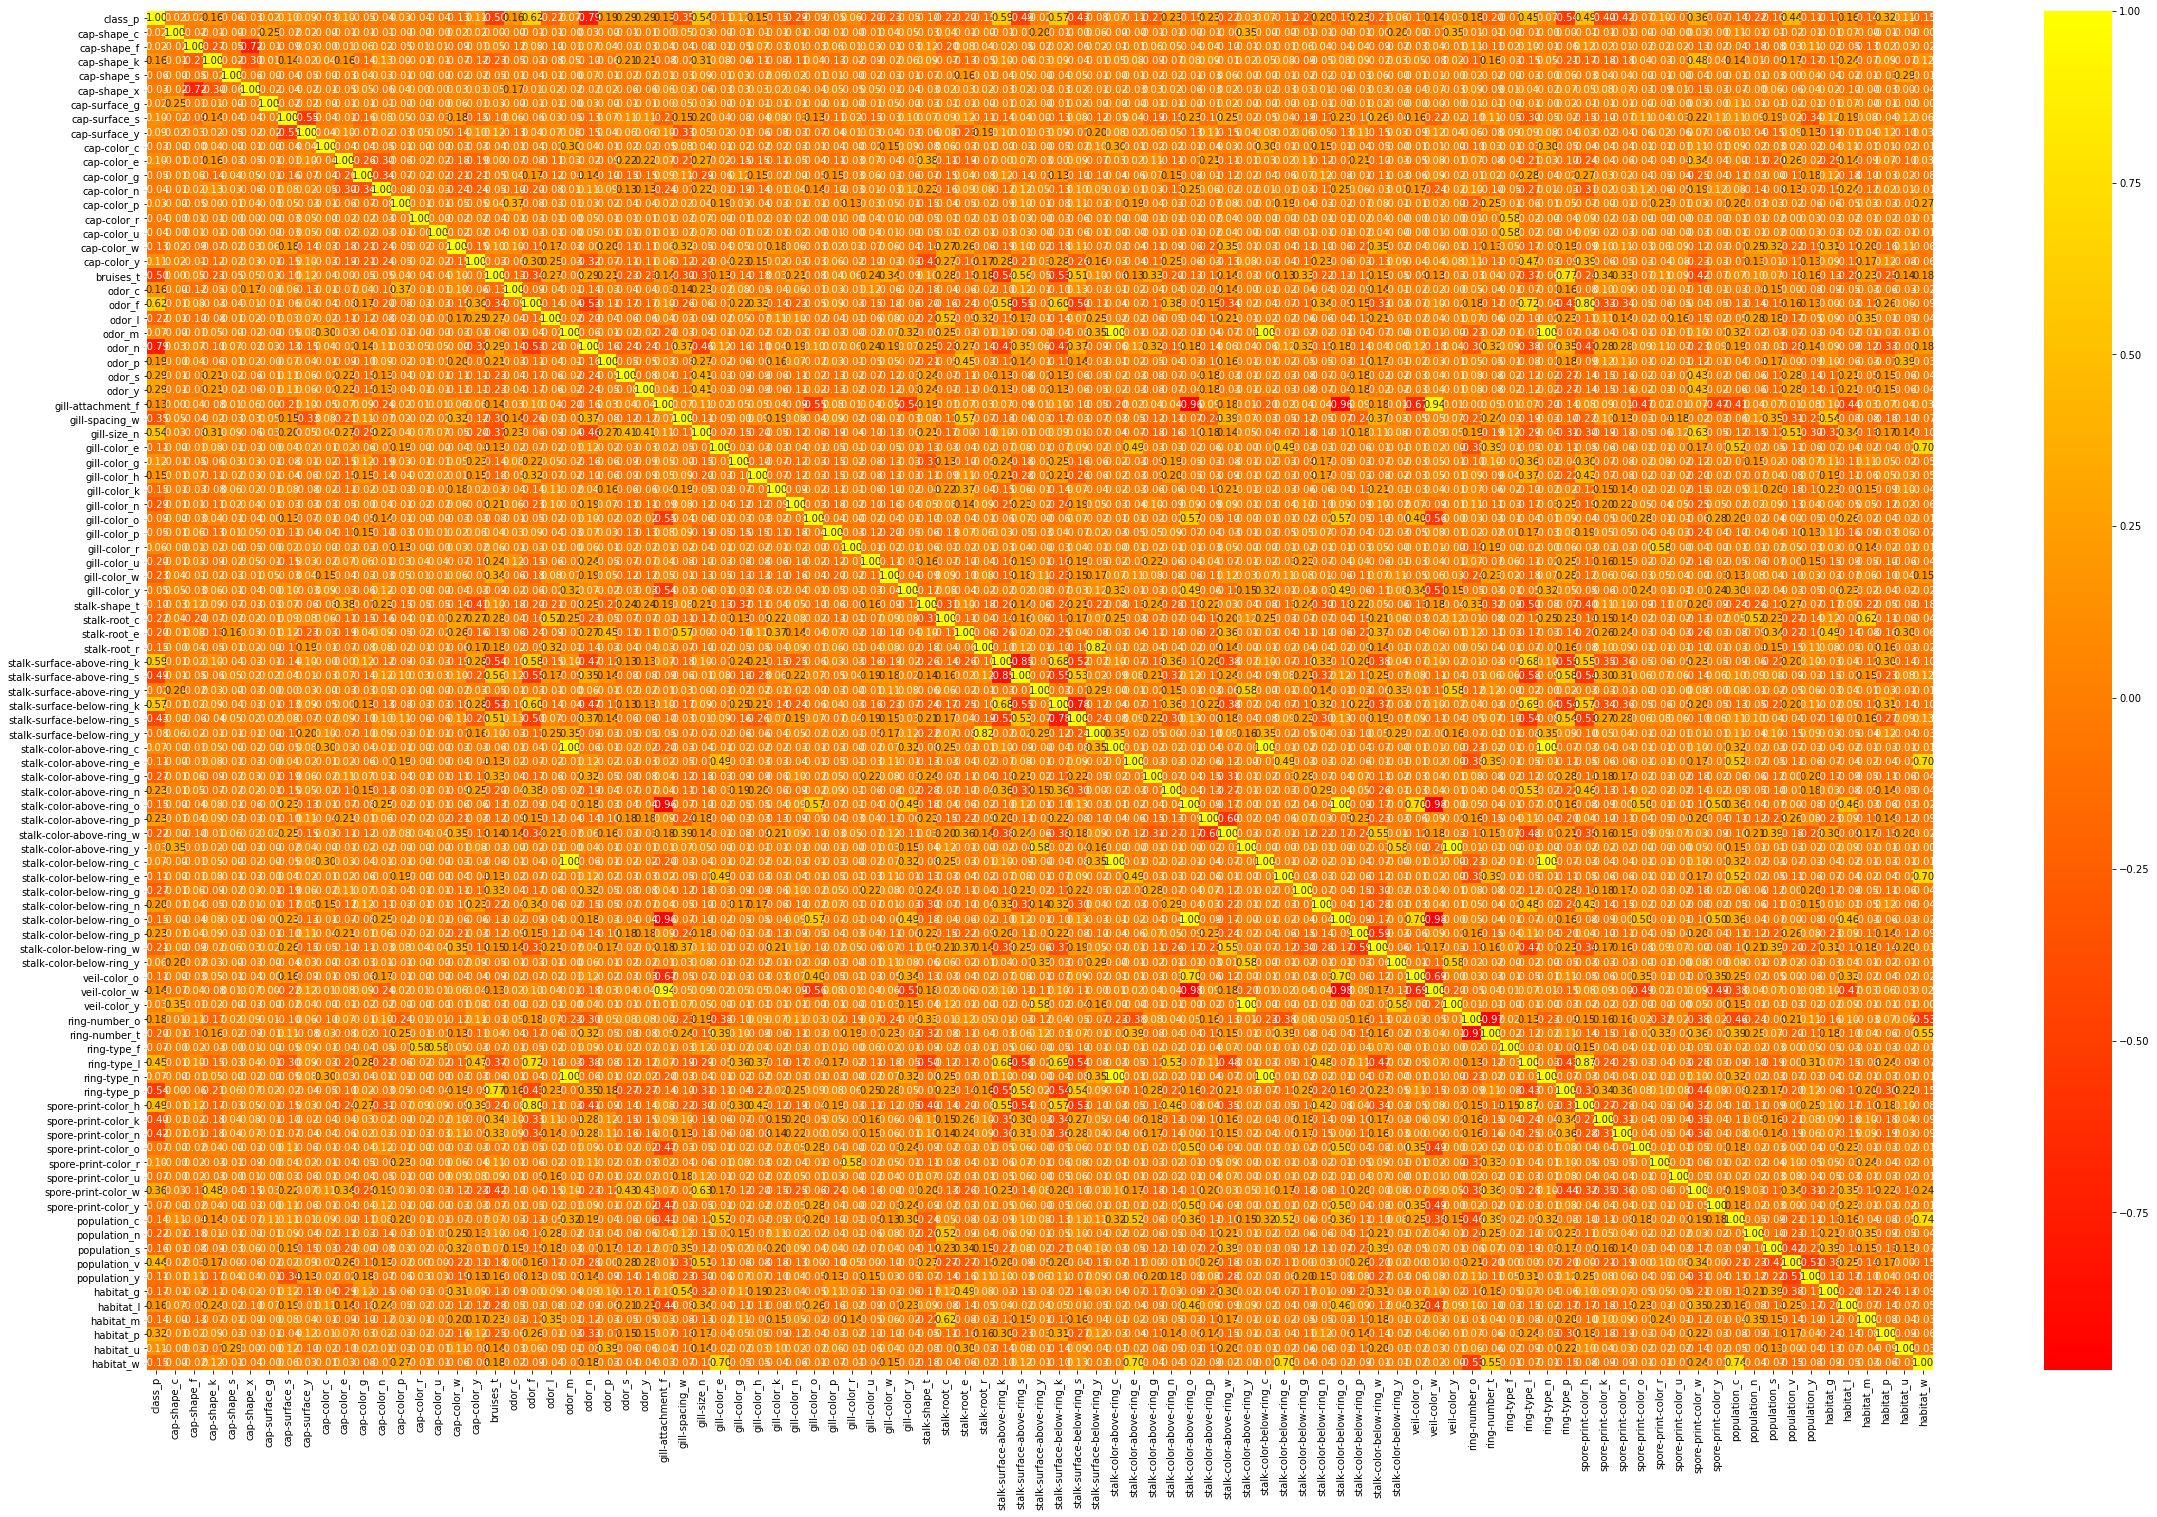

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(df2.corr(),annot=True,fmt='0.2f',cmap='autumn')
plt.show()



> # Splitting the data set to Train and Test with df2 



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
X=df2.drop('class_p',axis=1)
y=df2['class_p']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(5686, 94)
(2438, 94)
(5686,)
(2438,)
(8124, 94)
(8124,)


In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score , roc_curve,classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score,KFold



lr = LogisticRegression(fit_intercept=True)
gnb= GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(ccp_alpha=0.01) # to increase pruning and avoid overfitting
svm= SVC(probability=True)
lda=LinearDiscriminantAnalysis()

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state=123)))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=123)))
models.append(('SVM', SVC(probability=True,random_state=123)))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.999297 (0.001166)
GNB: 0.943897 (0.010653)
KNN: 0.999649 (0.001054)
DecisionTree: 1.000000 (0.000000)
SVM: 0.999297 (0.001166)
LDA: 0.999649 (0.000703)


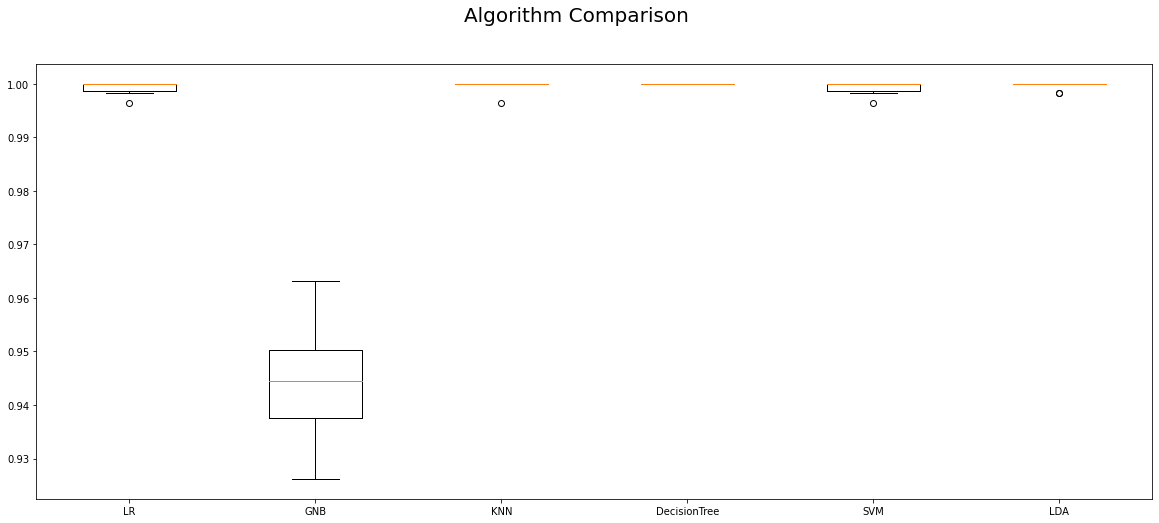

In [ ]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison',fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(20,8)
plt.show()



> ### -Logistic Regression



Confusion Matrix- Train: 
 [[2937    0]
 [   3 2746]]
Overall Accuracy-Train: 0.9994723883221949
AUC-Train 1.0
**************************************************
Confusion matrix - Test : 
 [[1271    0]
 [   4 1163]]
Overall Accuracy - Test : 0.9983593109105825
AUC - Test: 1.0
**************************************************
3 Fold Cross Validation Scores
[0.9880039  0.99991753 0.97501686]
Bias Error: 1.2353902534791246
Variance Error: 1.016880163533673
**************************************************
Classification Report for test model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



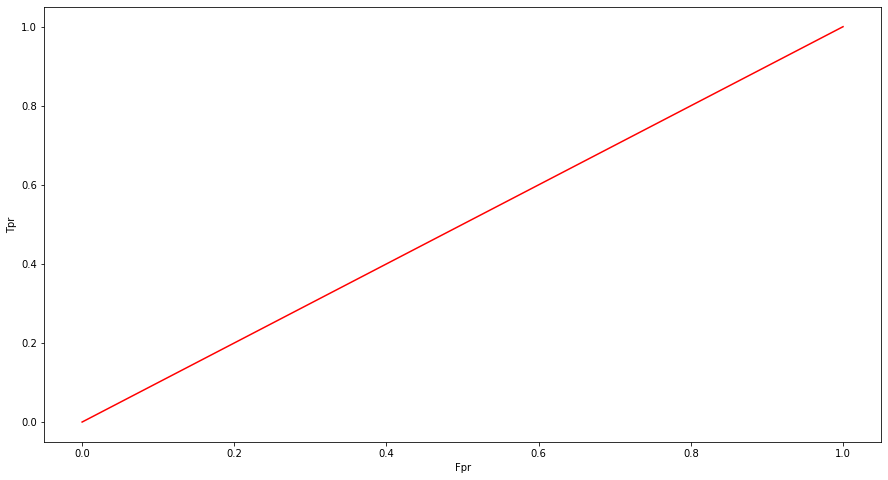

In [ ]:
model_eval(lr,X_train,X_test,y_train,y_test) # Going with only LR as we selected this as base model



> # DF3 Contains those features after Feature Selection using RFE



In [ ]:
df3=df.copy(deep=True)

In [ ]:
df3=pd.get_dummies(df4,drop_first=True)
df3.shape

(8124, 95)

In [ ]:
X=df3.drop('class_p',axis=1)
y=df3['class_p']

In [ ]:
import statsmodels.api as sm
X_1=sm.add_constant(X)
model=sm.OLS(y,X_1).fit()
model.pvalues 

const          1.0
cap-shape_c    1.0
cap-shape_f    1.0
cap-shape_k    1.0
cap-shape_s    1.0
              ... 
habitat_l      1.0
habitat_m      1.0
habitat_p      1.0
habitat_u      1.0
habitat_w      0.0
Length: 95, dtype: float64

In [ ]:
cols=list(X.columns)
pmax=1
while (len(cols)>0):            # Using Backwad Elimination 
  p=[]
  X_1=X[cols]
  X_1=sm.add_constant(X_1)
  model=sm.OLS(y,X_1).fit()
  p=pd.Series(model.pvalues.values[1:],index=cols)
  pmax=max(p)
  feature_with_p_max=p.idxmax()
  if(pmax > 0.05):
    cols.remove(feature_with_p_max)
  else:
    break
selected_features_BE=cols
print(selected_features_BE)

['cap-shape_c', 'cap-surface_s', 'cap-color_w', 'cap-color_y', 'odor_c', 'odor_f', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-size_n', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_c', 'stalk-color-above-ring_o', 'stalk-color-below-ring_o', 'stalk-color-below-ring_w', 'veil-color_w', 'ring-number_o', 'ring-number_t', 'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p', 'spore-print-color_h', 'spore-print-color_r', 'spore-print-color_w', 'habitat_w']


In [ ]:
df3=df3[['cap-shape_c',
 'cap-surface_s',
 'cap-color_w',
 'cap-color_y',
 'odor_c',
 'odor_f',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'gill-size_n',
 'gill-color_e',
 'gill-color_g',
 'gill-color_h',
 'gill-color_k',
 'gill-color_n',
 'gill-color_o',
 'gill-color_p',
 'gill-color_r',
 'gill-color_u',
 'gill-color_w',
 'gill-color_y',
 'stalk-shape_t',
 'stalk-root_c',
 'stalk-root_e',
 'stalk-root_r',
 'stalk-surface-above-ring_y',
 'stalk-surface-below-ring_y',
 'stalk-color-above-ring_c',
 'stalk-color-above-ring_o',
 'stalk-color-below-ring_o',
 'stalk-color-below-ring_w',
 'veil-color_w',
 'ring-number_o',
 'ring-number_t',
 'ring-type_f',
 'ring-type_l',
 'ring-type_n',
 'ring-type_p',
 'spore-print-color_h',
 'spore-print-color_r',
 'spore-print-color_w',
 'habitat_w',
 'class_p']]

In [ ]:
X=df3.drop('class_p',axis=1)
y=df3['class_p']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(5686, 44)
(2438, 44)
(5686,)
(2438,)
(8124, 44)
(8124,)


In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score , roc_curve,classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score,KFold

lr = LogisticRegression(fit_intercept=True)
gnb= GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(ccp_alpha=0.01) # to increase pruning and avoid overfitting
svm= SVC(probability=True)
lda=LinearDiscriminantAnalysis()

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state=123)))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=123)))
models.append(('SVM', SVC(probability=True,random_state=123)))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998945 (0.002109)
GNB: 0.994900 (0.002883)
KNN: 0.999649 (0.001054)
DecisionTree: 1.000000 (0.000000)
SVM: 0.999297 (0.001166)
LDA: 0.999297 (0.001166)


Confusion Matrix- Train: 
 [[2937    0]
 [   4 2745]]
Overall Accuracy-Train: 0.9992965177629265
AUC-Train 0.999954544401759
**************************************************
Confusion matrix - Test : 
 [[1271    0]
 [   4 1163]]
Overall Accuracy - Test : 0.9983593109105825
AUC - Test: 0.999886061552381
**************************************************
3 Fold Cross Validation Scores
[0.97768611 0.99888143 0.85797265]
Bias Error: 5.515326772910257
Variance Error: 6.203568686987305
**************************************************
Classification Report for test model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



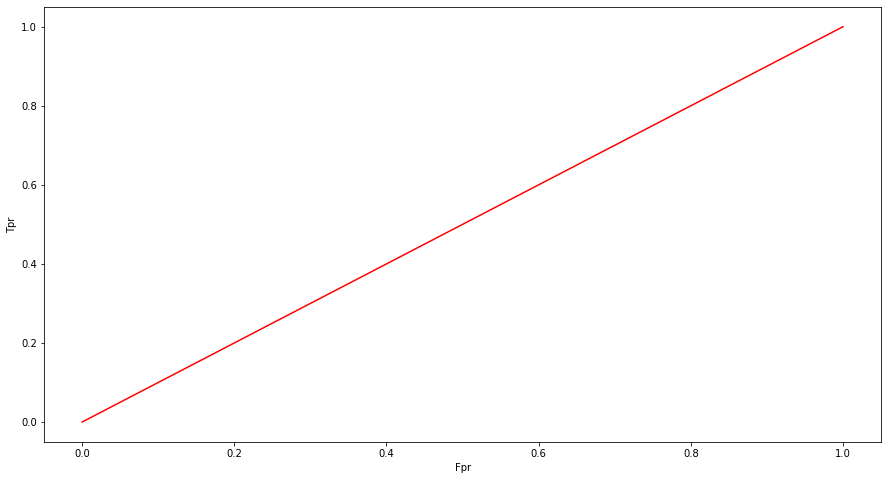

In [ ]:
model_eval(lr,X_train,X_test,y_train,y_test)

### 8.

1. We see a huge performance improvement as Logistic regression's overall accuracy improved from 95% to 99% just by transforming the data from Label Encoding to One Hot Encoding.

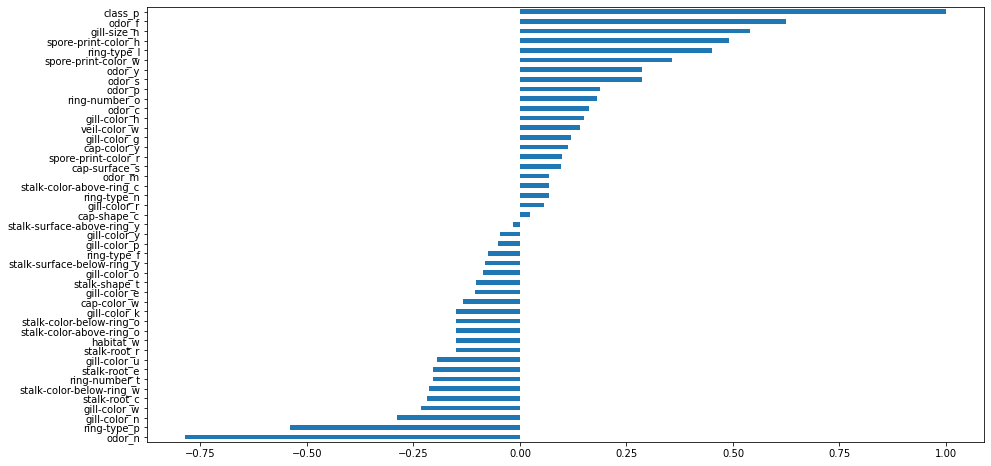

In [ ]:
#2.
plt.figure(figsize=(15,8))
df4.corr()['class_p'].sort_values().plot(kind='barh')
plt.show()

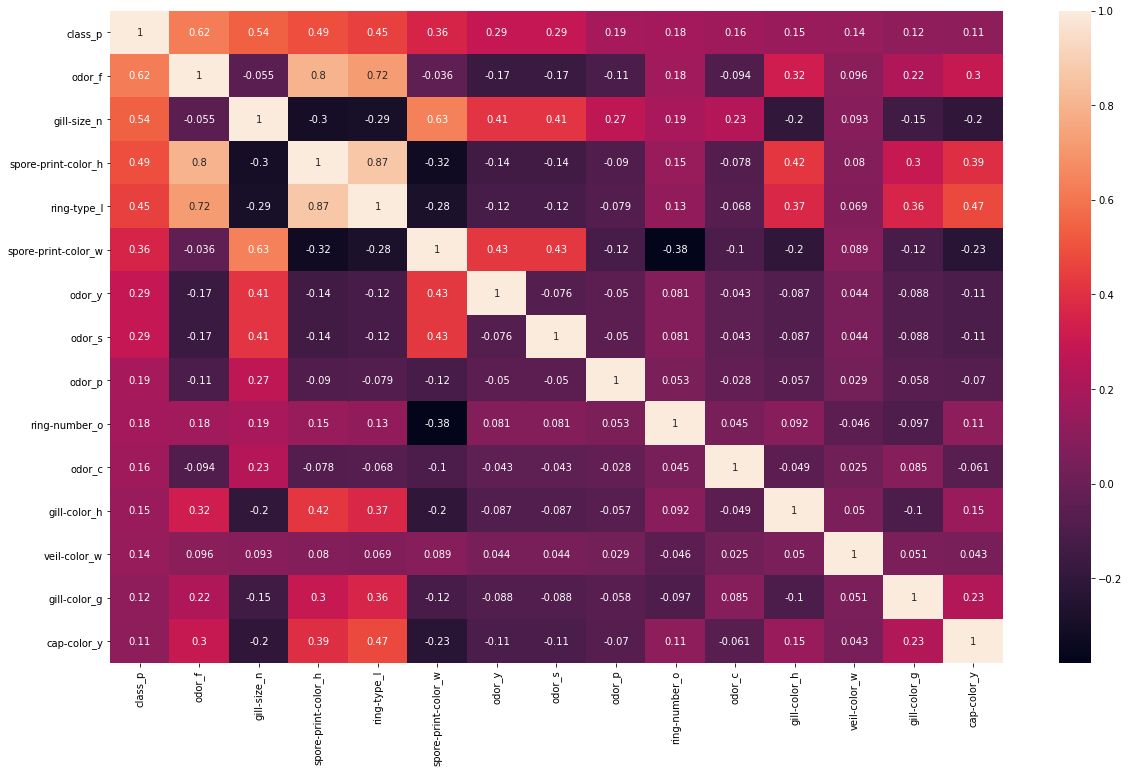

In [ ]:
corr=df4.corr()                   # Top 15 features that high high correlation with class after feature selection 
cols=corr.nlargest(15,'class_p').index
cm = np.corrcoef(df4[cols].values.T)
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

- The buiness interpretation of the model would be to implement this model in the field of biology and agriculture where we can classify consumer products. 
- Here we were dealing with mushrooms being either edible or poisonous and we see such kind of analysis being made majorly in the agri-tech industry.

### The changes in the base model that has the most effect on model performance are:-

1. Feature selection reduced the features from a total of 95 to 44 which is a huge imrovement.
2. Label encoding creates biasness towards certain observations in features and therefore one hot encoding performed better by increasing the overall accuracy. 
3. These changes gave us a perfect overall score where bias and variance tradeoff could be met and at the same time achieve the desired results.



### The key risks and to the results are:

1. Presence of multicollinearity is a high risk as we have 95 features after one hot encoding. Feature selection using backward elimination method was helpful but doesnt gurantee removal of multicollinearity.
2. Alot of assumptions were made on normality and equality of variance of distribution and certain statistical tests ought to be performed to make sure our assumptions are right.
3. Overall the prediction score given by Logistic Regression is fantastic and need not worry about overfitting as logisitc regression takes care of this automatically by penalising certain features using ridge functionality which is a default in-built parametric.



# THE END